# SciPy

The SciPy library is one of the core packages that make up the SciPy stack. t provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

Library document: [http://www.scipy.org/scipylib/index.html](http://www.scipy.org/scipylib/index.html)

In [1]:
# If we need to display the graphs on this page, use following code
%matplotlib inline
from pylab import *

In [6]:
import numpy as np
from scipy.integrate import quad, dblquad, tplquad

## 1. Interation

This shows how to calcuate integration of a function with SciPy.

Integral: [https://en.wikipedia.org/wiki/Integral](https://en.wikipedia.org/wiki/Integral)

In [7]:
# Calculate integration of a function, return the integrate and absolute error
val, abserr = quad(lambda x: exp(-x ** 2), Inf, Inf)
val, abserr

(0.0, 0.0)

## 2. Spacial functions

This module provide special functions. Here is the list of special functions: [https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special)

Frequently used ones are:

- Baseel function: `scipy.special.jn()`
- Elliptic function: `scipy.special.ellipj()`
- Gamma function: `scipy.special.gamma()`
- Erf, the area under a Gaussian curve: `scipy.special.erf()`

## 3. Linear algebra operations

The `scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

- Compute determinant of a square matrix

In [22]:
from scipy import  linalg
arr = np.array([[1,2],
                [3,4]])

In [23]:
linalg.det(arr)

-2.0

In [24]:
arr2 = np.array([[3,2], 
                 [6,4]])
linalg.det(arr2)

6.661338147750939e-16

In [25]:
# The matrix should be a square matrix
linalg.det(np.ones((3,4)))

ValueError: expected square matrix

- Compute the inverse of a sqare matrix

In [26]:
arr = np.array([[1,2],
                [3,4]])

In [27]:
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [28]:
# product of a matrix and it's inverse is an eye matrix
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [29]:
# Cannot computing the inverse of a singular matrix (its determinant is zero)
linalg.inv(arr2)

LinAlgError: singular matrix

- More advance operations

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in [`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg).

In [32]:
# singular-value decomposition (SVD)
arr = np.arange(9).reshape((3,3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [33]:
# The resulting array spectrum is:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

In [35]:
# The original matrix can be re-composed
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

## 4. Fast Fourier Transforms

The [`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) module allows to compute fast Fourier transforms. As an illustration, a (noisy) input signal may look like:

In [43]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)

The observer doesn’t know the signal frequency, only the sampling time step of the signal sig. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The `scipy.fftpack.fftfreq()` function will generate the sampling frequencies and `scipy.fftpack.fft()` will compute the fast Fourier transform:

In [44]:
from scipy import fftpack

In [45]:
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding the frequency:

In [46]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

[]

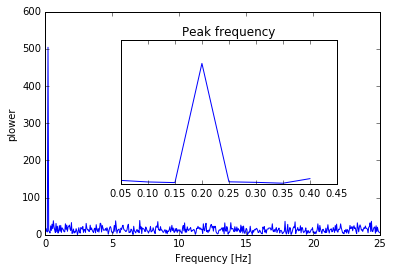

In [52]:
import pylab as plt
plt.figure()
plt.plot(freqs, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

The signal frequency can be found by:

In [47]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period) # check that correct freq is found

True

Now the high-frequency noise will be removed from the Fourier transformed signal:

In [48]:
sig_fft[np.abs(sample_freq) > freq] = 0

The resulting filtered signal can be computed by the `scipy.fftpack.ifft()` function:

In [49]:
main_sig = fftpack.ifft(sig_fft)

The result can be viewed with:

/Users/trang/anaconda2/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


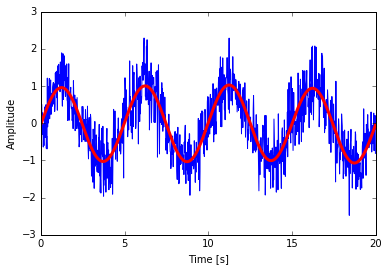

In [57]:
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, 'r', linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')